In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
visa_df=pd.read_csv('Visadataset.csv')

In [3]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [4]:
visa_df.select_dtypes(exclude="object").columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [6]:
visa_df[['no_of_employees']]

,no_of_employees
0,14513
1,2412
2,44444
3,98
4,1082
...,...
25475,2601
25476,3274
25477,1121
25478,1918


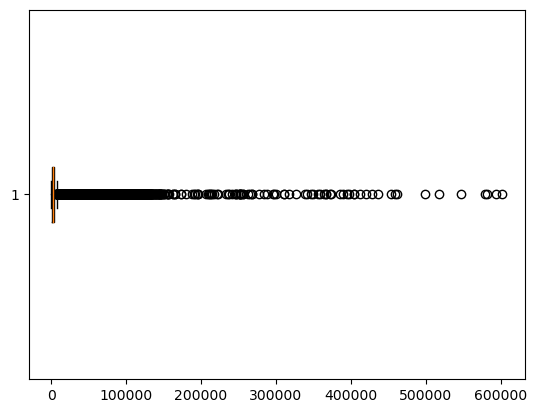

In [10]:
plt.boxplot(visa_df['no_of_employees'],vert=False)
plt.show()

In [21]:
q1=np.percentile(visa_df['no_of_employees'],25)
q3=np.percentile(visa_df['no_of_employees'],75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
cond1=visa_df['no_of_employees']<LB
cond2=visa_df['no_of_employees']>UB
outlier=visa_df[cond1|cond2]
non_outlier=visa_df[~(cond1|cond2)]
print(len(outlier))
print(len(non_outlier))

print(len(outlier)+len(non_outlier))

1556
23924
25480


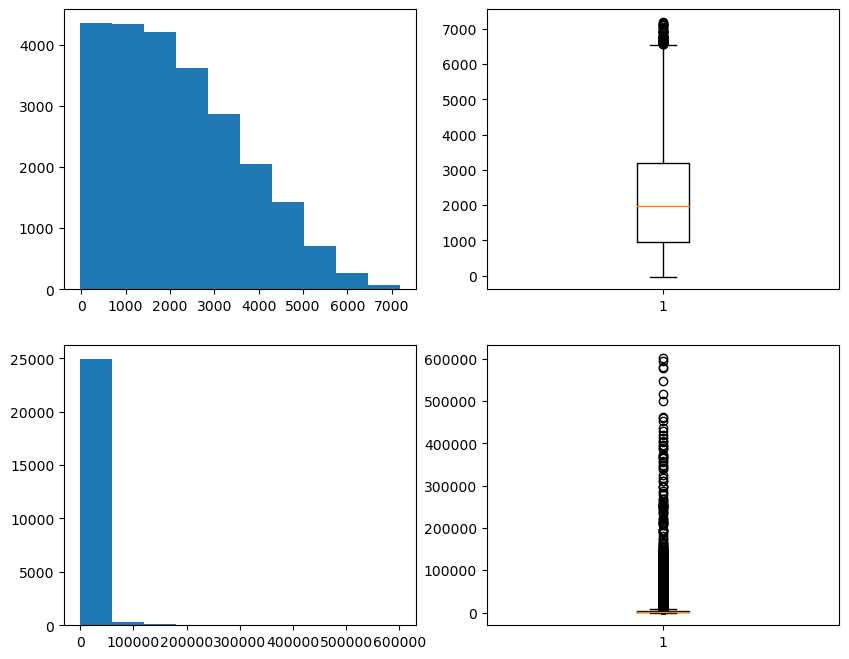

In [29]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1).hist(non_outlier['no_of_employees'])
plt.subplot(2,2,2).boxplot(non_outlier['no_of_employees'])
plt.subplot(2,2,3).hist(visa_df['no_of_employees'])
plt.subplot(2,2,4).boxplot(visa_df['no_of_employees'])
plt.show()

### Removing outlier using median

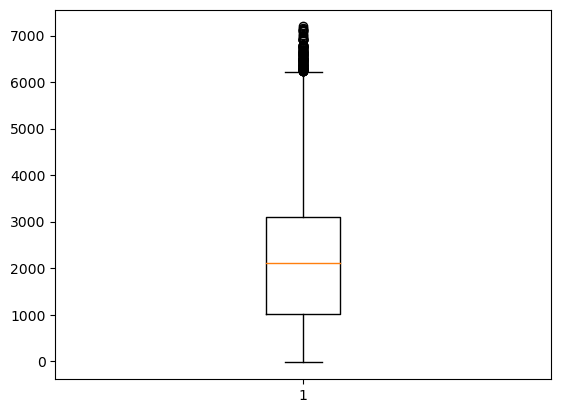

In [33]:
l=[]
for i in visa_df['no_of_employees'].values:
    if(i<LB or i>UB):
        l.append(visa_df['no_of_employees'].median())
    else:
        l.append(i)
visa_df_copy=visa_df.copy()
visa_df_copy['no_of_employees']=l
plt.boxplot(visa_df_copy['no_of_employees'])
plt.show()

np.where

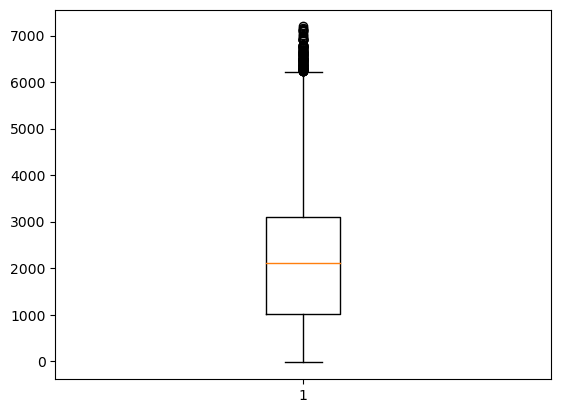

In [39]:
cond1=visa_df['no_of_employees']<LB
cond2=visa_df['no_of_employees']>UB
cond=cond1|cond2
l=np.where(cond,visa_df['no_of_employees'].median(),visa_df['no_of_employees'])
visa_df_copy=visa_df.copy()
visa_df_copy['no_of_employees']=l
plt.boxplot(visa_df_copy['no_of_employees'])
plt.show()